# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

#### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [8]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.0015958786010742188 (+/- 0.0004884414251808379)
average score time : 0.0017952919006347656 (+/- 0.0003989936452784955)
average test score : 0.96 (+/- 0.024944382578492935)


In [9]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.014960432052612304 (+/- 0.0006305250684733893)
average score time : 0.006382417678833008 (+/- 0.0007973559320282183)
average test score : 0.9466666666666667 (+/- 0.01632993161855452)


#### 와인 데이터

In [12]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [13]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.0011970043182373048 (+/- 0.0003986835907469673)
average score time : 0.0017952919006347656 (+/- 0.00039875593955112726)
average test score : 0.9493650793650794 (+/- 0.037910929811115976)


In [14]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.01514887809753418 (+/- 0.00184313507549945)
average score time : 0.004788351058959961 (+/- 0.00039956795513521596)
average test score : 0.9441269841269841 (+/- 0.030140345273442355)


#### 유방암 데이터

In [15]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [16]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.001396322250366211 (+/- 0.000488597206061424)
average score time : 0.09075703620910644 (+/- 0.0008919100121744622)
average test score : 0.9648501785437045 (+/- 0.009609970350036127)


In [17]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.02752528190612793 (+/- 0.003253449484433632)
average score time : 0.012767219543457031 (+/- 0.0017155571215390609)
average test score : 0.9543393882937432 (+/- 0.01784122964709569)


### SVC

#### 붓꽃 데이터

In [18]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [19]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.002593708038330078 (+/- 0.0004889674645387914)
average score time : 0.0005980968475341797 (+/- 0.0004883440310753092)
average test score : 0.9666666666666666 (+/- 0.02108185106778919)


In [20]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.0287200927734375 (+/- 0.003178743447873515)
average score time : 0.003795909881591797 (+/- 0.0007387913623252118)
average test score : 0.9400000000000001 (+/- 0.044221663871405324)


#### 와인 데이터

In [21]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [22]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.0033925056457519533 (+/- 0.0004888766400840462)
average score time : 0.0009972572326660157 (+/- 4.479224611594154e-06)
average test score : 0.9833333333333334 (+/- 0.022222222222222233)


In [23]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.024526357650756836 (+/- 0.0027976077765535633)
average score time : 0.0035909175872802734 (+/- 0.0007961274478557649)
average test score : 0.95 (+/- 0.04444444444444447)


#### 유방암 데이터

In [24]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [25]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.006500434875488281 (+/- 0.00047078942806088724)
average score time : 0.0028028011322021483 (+/- 0.00040453158103857085)
average test score : 0.9736376339077782 (+/- 0.014678541667933545)


In [26]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.03233318328857422 (+/- 0.004105443446944826)
average score time : 0.01057586669921875 (+/- 0.003256276626553343)
average test score : 0.9701288619779538 (+/- 0.0142415326274357)


### Decision Tree

##### 붓꽃 데이터

In [35]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [36]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.001991462707519531 (+/- 0.0006354274503312627)
average score time : 0.0005992889404296875 (+/- 0.0004893345015766084)
average test score : 0.9600000000000002 (+/- 0.03265986323710903)


In [37]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.02335782051086426 (+/- 0.002718011397357769)
average score time : 0.0022005081176757813 (+/- 0.0003414647703338469)
average test score : 0.9400000000000001 (+/- 0.038873012632301994)


##### 와인 데이터

In [38]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [39]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.0023958683013916016 (+/- 0.00048745383719093463)
average score time : 0.0007996082305908204 (+/- 0.00039982766997043254)
average test score : 0.8709523809523809 (+/- 0.04130828490281938)


In [40]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.021344423294067383 (+/- 0.0013531799102189245)
average score time : 0.002591562271118164 (+/- 0.00048624283296133485)
average test score : 0.9274603174603175 (+/- 0.05695206242943257)


##### 유방암 데이터

In [41]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [42]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.006195259094238281 (+/- 0.0003922359512502818)
average score time : 0.0004124641418457031 (+/- 0.0005052173738919144)
average test score : 0.9138798323241734 (+/- 0.012916894319952247)


In [43]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.028322458267211914 (+/- 0.00048803257011281964)
average score time : 0.002019500732421875 (+/- 2.0323334467137954e-05)
average test score : 0.9490762303990063 (+/- 0.027919522062661673)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [5]:
diabetes = load_diabetes()

#### KNN

##### 당뇨병 데이터

In [76]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [77]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.001996135711669922 (+/- 4.056200088145587e-06)
average score time : 0.0013941287994384765 (+/- 0.00048786243157079493)
average test score : 0.3689720650295623 (+/- 0.044659049060165365)


In [78]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.018152618408203126 (+/- 0.001595568958850061)
average score time : 0.009174776077270509 (+/- 0.00039925838646361067)
average test score : 0.4038762619837658 (+/- 0.04431774057121028)


#### SVR

##### 당뇨병 데이터

In [79]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [80]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.006978178024291992 (+/- 0.0006324112129652298)
average score time : 0.003811025619506836 (+/- 0.0007428063677048443)
average test score : 0.14659868748701577 (+/- 0.021908831719954325)


In [81]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.03375086784362793 (+/- 0.003911726460659828)
average score time : 0.012965774536132813 (+/- 0.0006517609515618143)
average test score : 0.06820417235874895 (+/- 0.0334183163292327)


#### Decision Tree

In [83]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [84]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.003015613555908203 (+/- 2.9511790336038286e-05)
average score time : 0.0006000041961669922 (+/- 0.0004913571174848893)
average test score : -0.16611672570195837 (+/- 0.1451657487173349)


In [85]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.027362632751464843 (+/- 0.002926438919820112)
average score time : 0.002183055877685547 (+/- 0.0007559916161852854)
average test score : 0.33934961575996797 (+/- 0.07099788560199168)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [28]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

### Random Forests 분류

In [87]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [88]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.17293686866760255 (+/- 0.007943575541047455)
average score time : 0.009773921966552735 (+/- 0.0020344943283455725)
average test score : 0.96 (+/- 0.024944382578492935)


In [89]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.18271188735961913 (+/- 0.004250198536268826)
average score time : 0.009773731231689453 (+/- 0.0015959145515238762)
average test score : 0.9663492063492063 (+/- 0.0109581305359322)


In [90]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.1845097064971924 (+/- 0.009811616653465355)
average score time : 0.009173822402954102 (+/- 0.0015969059678705732)
average test score : 0.9595870206489675 (+/- 0.01717082556890873)


### Random Forests 회귀

In [91]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

bagging_model = BaggingRegressor(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [92]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.2429515838623047 (+/- 0.019443707973946216)
average score time : 0.00617527961730957 (+/- 0.00040255854161432486)
average test score : 0.4126582697848226 (+/- 0.04845389592510167)


### Extremely Randomized Trees 분류

In [94]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [95]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.08477745056152344 (+/- 0.005455311605115803)
average score time : 0.008392524719238282 (+/- 0.002044040234487395)
average test score : 0.9533333333333334 (+/- 0.03399346342395189)


In [96]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.0909644603729248 (+/- 0.012827773298511414)
average score time : 0.007374906539916992 (+/- 0.0013544957167365911)
average test score : 0.9665079365079364 (+/- 0.032368500562618134)


In [97]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.09438004493713378 (+/- 0.005980714228257266)
average score time : 0.008566617965698242 (+/- 0.0013772138308115862)
average test score : 0.9630957925787922 (+/- 0.01700345009426096)


### Extremely Randomized Trees 회귀

In [98]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

bagging_model = BaggingRegressor(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [99]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.1474163055419922 (+/- 0.009706310513384666)
average score time : 0.006396865844726563 (+/- 0.0010235977139976045)
average test score : 0.44064628106604137 (+/- 0.047114265757233334)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [101]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 42

In [112]:
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
            RandomForestClassifier(n_estimators=n_estimators),
            ExtraTreesClassifier(n_estimators=n_estimators)]

[DecisionTreeClassifier(max_features='sqrt', random_state=1070701974), DecisionTreeClassifier(max_features='sqrt', random_state=448469222), DecisionTreeClassifier(max_features='sqrt', random_state=1762581228), DecisionTreeClassifier(max_features='sqrt', random_state=171116174), DecisionTreeClassifier(max_features='sqrt', random_state=1097583786), DecisionTreeClassifier(max_features='sqrt', random_state=872141340), DecisionTreeClassifier(max_features='sqrt', random_state=982680611), DecisionTreeClassifier(max_features='sqrt', random_state=1902041612), DecisionTreeClassifier(max_features='sqrt', random_state=330626207), DecisionTreeClassifier(max_features='sqrt', random_state=424623942), DecisionTreeClassifier(max_features='sqrt', random_state=1244473018), DecisionTreeClassifier(max_features='sqrt', random_state=836594930), DecisionTreeClassifier(max_features='sqrt', random_state=692440149), DecisionTreeClassifier(max_features='sqrt', random_state=1634096923), DecisionTreeClassifier(max_

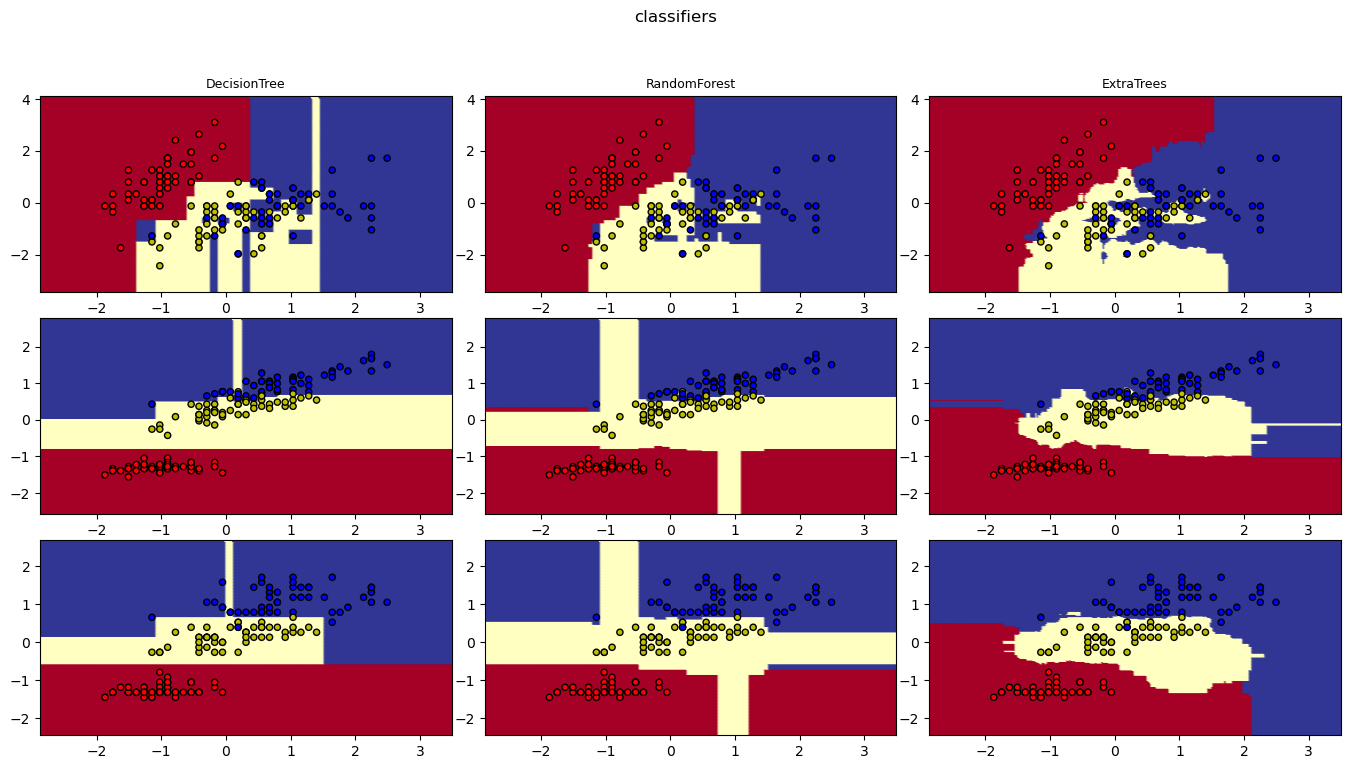

In [113]:
plt.figure(figsize=(14, 8))

for pair in ([0,1],[0,2],[0,3]):
    
    for model in models:
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis = 0)
        std = X.std(axis = 0)
        X = (X-mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        min_x, max_x = X[:,0].min()-1, X[:, 0].max() + 1
        min_y, max_y = X[:,1].min()-1, X[:, 1].max() + 1
        
        xx, yy = np.meshgrid(np.arange(min_x, max_x, plot_step),
                             np.arange(min_y, max_y, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap = cmap)
        else:
            print(model.estimators_)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha = estimator_alpha, cmap=cmap)
                
                
        xx_coarser, yy_coarser = np.meshgrid(np.arange(min_x, max_x, plot_step),
                                             np.arange(min_y, max_y, plot_step))
        Z_point_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()])
        
        cs_points = plt.scatter(xx_coarser, yy_coarser, s = 15, c=Z_point_coarser, cmap=cmap, edgecolors='none')
        
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r', 'y', 'b']), edgecolors='k', s=20)
        
        plot_idx += 1

plt.suptitle("classifiers", fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [123]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

In [124]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [125]:
plt.figure(figsize=(14, 8))

for pair in (0, 1, 2):
    
    for model in models:
        X = diabetes.data[:, pair]
        y = diabetes.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y
        
        mean = X.mean(axis = 0)
        std = X.std(axis = 0)
        X = (X-mean) / std
        
        model.fit(X.reshape(-1, 1), y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        min_x, max_x = X.min()-1, X.max() + 1
        min_y, max_y = y.min()-1, y.max() + 1
        
        xx, yy = np.meshgrid(np.arange(min_x, max_x, plot_step),
                             np.arange(min_y, max_y, plot_step))
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(np.c_[xx.reshape(-1, 1)])
            Z = Z.reshape(xx.shape)
            cs = plt.plot(xx, Z)
        else:
            print(model.estimators_)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.reshape(-1, 1)])
                Z = Z.reshape(xx.shape)
                cs = plt.plot(xx, Z, alpha = estimator_alpha)
                
        plt.scatter(X, y, c=y, edgecolors='k', s=20)
        
        plot_idx += 1

plt.suptitle("Regressor", fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

[DecisionTreeRegressor(max_features=1.0, random_state=674788031), DecisionTreeRegressor(max_features=1.0, random_state=233448894), DecisionTreeRegressor(max_features=1.0, random_state=1871200836), DecisionTreeRegressor(max_features=1.0, random_state=479836949), DecisionTreeRegressor(max_features=1.0, random_state=988011356), DecisionTreeRegressor(max_features=1.0, random_state=1802168566), DecisionTreeRegressor(max_features=1.0, random_state=204939202), DecisionTreeRegressor(max_features=1.0, random_state=1063996491), DecisionTreeRegressor(max_features=1.0, random_state=283627673), DecisionTreeRegressor(max_features=1.0, random_state=1528891023), DecisionTreeRegressor(max_features=1.0, random_state=681381298), DecisionTreeRegressor(max_features=1.0, random_state=1107440612), DecisionTreeRegressor(max_features=1.0, random_state=516103253), DecisionTreeRegressor(max_features=1.0, random_state=61819576), DecisionTreeRegressor(max_features=1.0, random_state=1468362012), DecisionTreeRegress

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_001.png)

In [6]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

#### AdaBoost 분류

In [11]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.05511417388916016 (+/- 0.0035385265303568133)
average score time : 0.0065670967102050785 (+/- 0.0016127860943465193)
average test score : 0.9466666666666667 (+/- 0.03399346342395189)


In [13]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.06462697982788086 (+/- 0.0033008289841525464)
average score time : 0.005784416198730468 (+/- 0.0013229379570054544)
average test score : 0.8028571428571428 (+/- 0.16007729929178363)


In [14]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.17854671478271483 (+/- 0.02781558385353433)
average score time : 0.006956624984741211 (+/- 0.0012469128977806254)
average test score : 0.9701133364384411 (+/- 0.019709915473893072)


#### AdaBoost 회귀

In [15]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

bagging_model = BaggingRegressor(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [16]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.06542253494262695 (+/- 0.02161759574451127)
average score time : 0.0028008460998535157 (+/- 0.000979247706548171)
average test score : 0.40867714362257007 (+/- 0.06348436608302777)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [17]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [18]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [19]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.21445827484130858 (+/- 0.005383918991467342)
average score time : 0.0008002758026123047 (+/- 0.0004008392704415606)
average test score : 0.9666666666666668 (+/- 0.02108185106778919)


In [20]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.33333864212036135 (+/- 0.011529428733960949)
average score time : 0.00040326118469238283 (+/- 0.0004939058844801553)
average test score : 0.9330158730158731 (+/- 0.04127777701479872)


In [21]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.46797914505004884 (+/- 0.011402355150114209)
average score time : 0.0007997035980224609 (+/- 0.0004003535514206511)
average test score : 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [22]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

bagging_model = BaggingRegressor(model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [23]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.09454865455627441 (+/- 0.005549358621315098)
average score time : 0.0003991127014160156 (+/- 0.0004888112341665077)
average test score : 0.4081870570307572 (+/- 0.06963773956881529)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [31]:
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
    )

In [32]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv = 5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


In [33]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft',
    weights=[2, 4, 5]
    )

In [34]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv = 5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [35]:
from itertools import product

In [36]:
X = iris.data[:, [0, 2]]
y = iris.target

In [37]:
model1 = DecisionTreeClassifier(max_depth=5)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)

vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting='soft', weights=[2, 4, 5])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)

vote_model = vote_model.fit(X, y)

In [38]:
min_x, max_x = X[:,0].min()-1, X[:,0].max()+1
min_y, max_y = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(min_x, max_x, 0.1),
                     np.arange(min_y, max_y, 0.1))

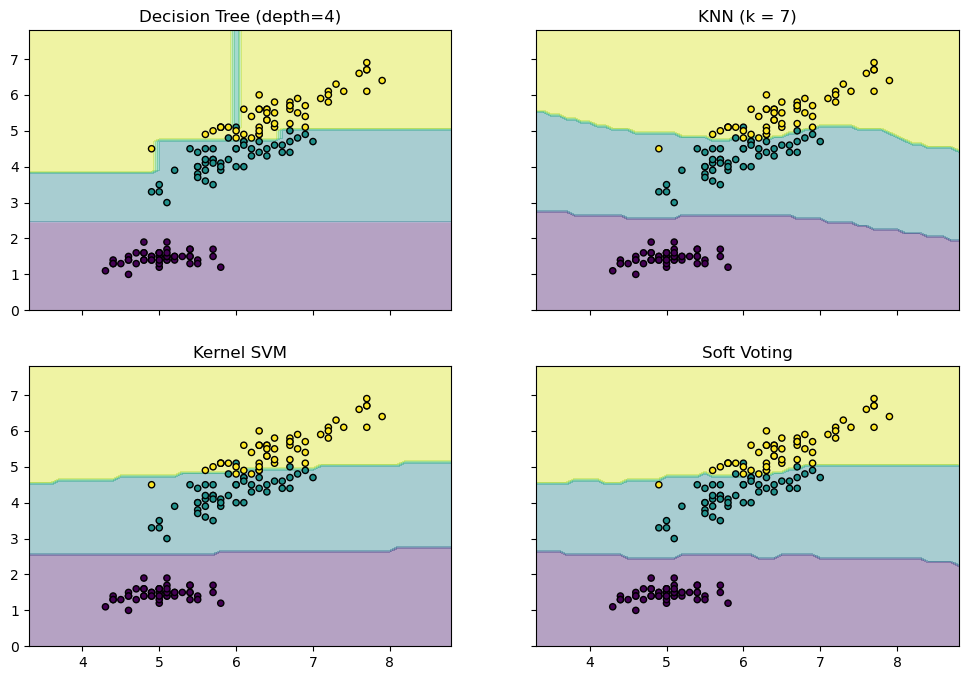

In [39]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k = 7)', 'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c = y, s = 20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()

vote_model = VotingRegressor(
    estimators = [('linear', model1), ('GBR', model2), ('RForestR', model3)],
    weights=[1, 2, 3]
    )

In [42]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, diabetes.data, diabetes.target, cv = 5)
    print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.48 (+/- 0.05) [LinearRegression]
R2: 0.41 (+/- 0.07) [GradientBoostingRegressor]
R2: 0.41 (+/- 0.05) [RandomForestRegressor]
R2: 0.45 (+/- 0.05) [VotingRegressor]


### 회귀식 시각화

In [43]:
X = diabetes.data[:, 0].reshape(-1, 1)
y = diabetes.target

In [44]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()

vote_model = VotingRegressor(
    estimators = [('linear', model1), ('GBR', model2), ('RForestR', model3)],
    weights=[1, 2, 3]
    )

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)


In [59]:
min_x, max_x = X.min()-1, X.max()+1
xx = np.arange(min_x-1, max_x+1, 0.1)

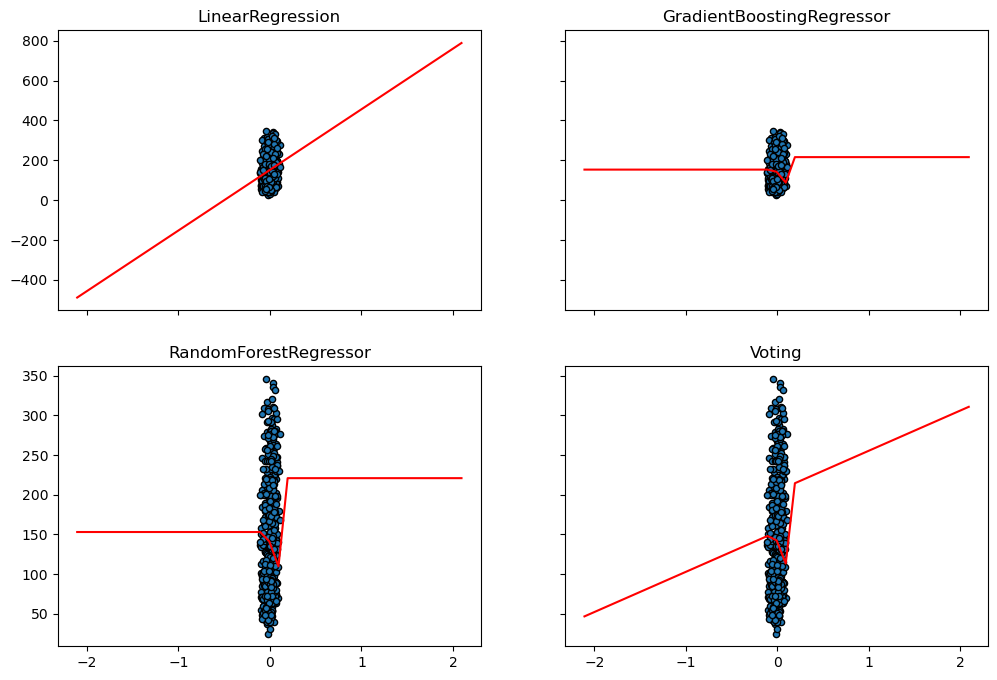

In [60]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor','Voting']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

In [71]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.linear_model import LogisticRegression

### 스택 회귀

In [62]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [63]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [64]:
cross_val = cross_validate(
    estimator=reg,
    X=diabetes.data, y=diabetes.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.14930973052978516 (+/- 0.011395378884923934)
average score time : 0.004787540435791016 (+/- 0.001466673901998069)
average test score : 0.37124429835021333 (+/- 0.07193820427415855)


#### 회귀식 시각화

In [65]:
X = diabetes.data[:, 0].reshape(-1, 1)
y = diabetes.target

In [66]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [67]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()

reg = StackingRegressor(
        estimators = estimators,
        final_estimator=GradientBoostingRegressor()
    )

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)


In [68]:
min_x, max_x = X.min()-1, X.max()+1
xx = np.arange(min_x-1, max_x+1, 0.1)

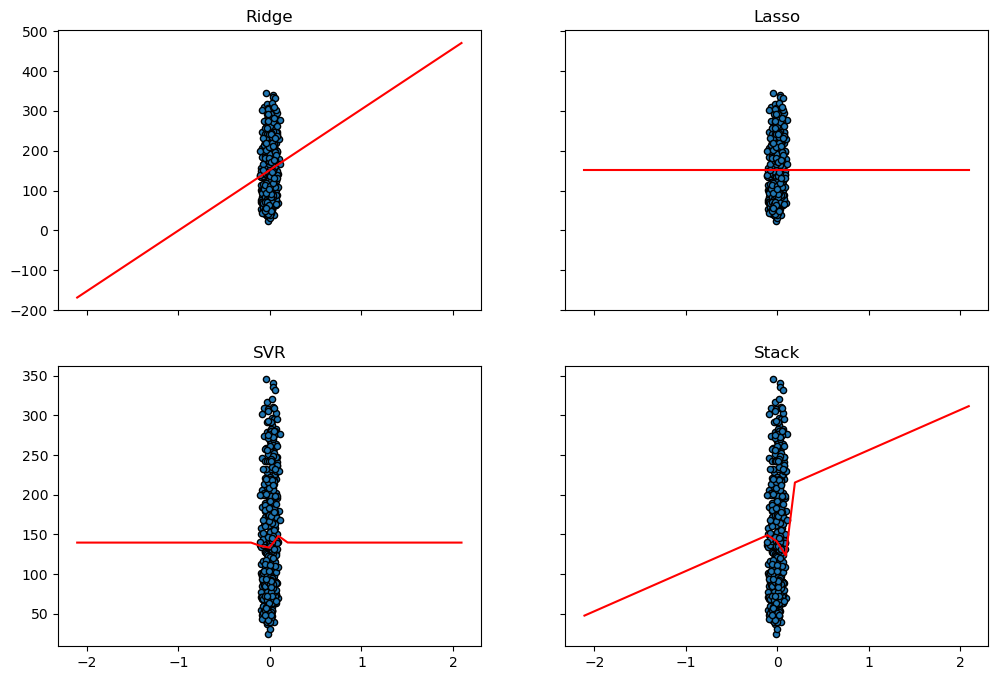

In [69]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR','Stack']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [72]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [73]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator=RandomForestClassifier()
    )

In [74]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=-1)
print('average fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('average score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('average test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

average fit time : 0.22859225273132325 (+/- 0.013086734953843248)
average score time : 0.008992433547973633 (+/- 0.002143246240038264)
average test score : 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [75]:
X = iris.data[:, [0, 2]]
y = iris.target

In [76]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()

stack_model = StackingClassifier(
            estimators = estimators,
            final_estimator=RandomForestClassifier()
    )

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)

stack_model = stack_model.fit(X, y)

In [77]:
min_x, max_x = X[:,0].min()-1, X[:,0].max()+1
min_y, max_y = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(min_x, max_x, 0.1),
                     np.arange(min_y, max_y, 0.1))

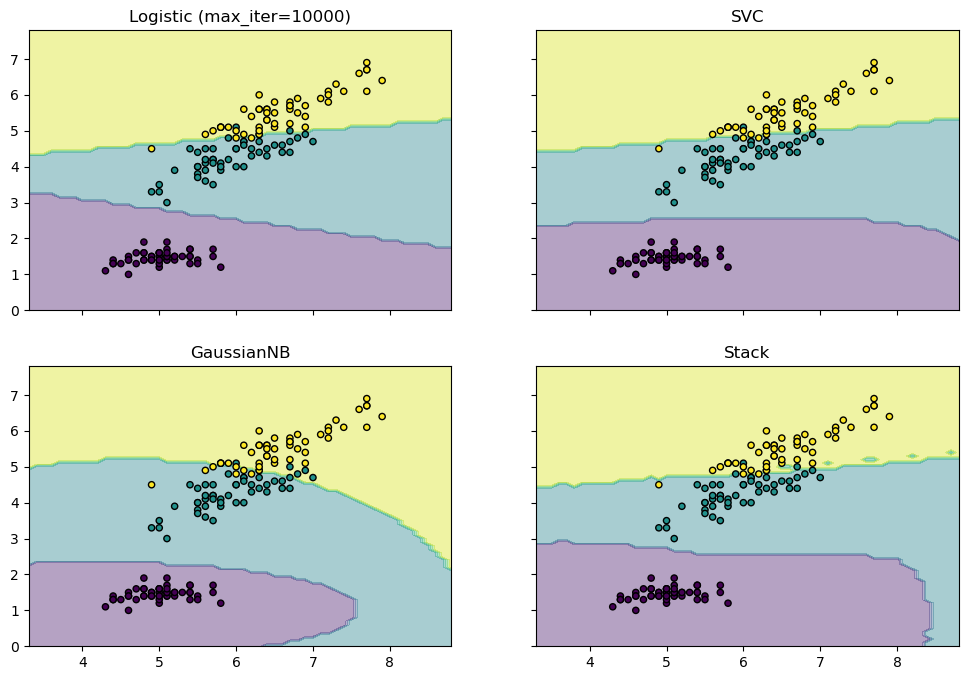

In [78]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack_model],
                          ['Logistic (max_iter=10000)', 'SVC', 'GaussianNB', 'Stack']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c = y, s = 20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()